In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cp2= "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runCP2_NAA_half_mask/DN7A_SACS2/aa_distribution.csv"
cp2_scaled = "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runCP2_NAA_half_mask_scaled/DN7A_SACS2/aa_distribution.csv"

puma = "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runPUMA_NAA_half_mask/DN7A_SACS2/aa_distribution.csv"
puma_scaled = "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runPUMA_NAA_half_mask_scaled/DN7A_SACS2/aa_distribution.csv"

In [ ]:
cp2_df = pd.read_csv(cp2)
cp2_scaled_df = pd.read_csv(cp2_scaled)
puma_df = pd.read_csv(puma)
puma_scaled_df = pd.read_csv(puma_scaled)

In [4]:
path_train = "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runoverfitting_check_part_mask/Training_sets/aa_distribution.csv"
path_test = "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runoverfitting_check_part_mask/Testing_sets/aa_distribution.csv"
path_train_scale = "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runoverfitting_check_scale/Training_sets/aa_distribution.csv"
path_test_scale = "/home/qcx679/hantang/UAAG2/ProteinGymSampling/runoverfitting_check_scale/Testing_set/aa_distribution.csv"

In [5]:
path_train_df = pd.read_csv(path_train)
path_test_df = pd.read_csv(path_test)
path_train_scale_df = pd.read_csv(path_train_scale)
path_test_scale_df = pd.read_csv(path_test_scale)

In [6]:
path_train_df['recovery_rate'] = 0
path_test_df['recovery_rate'] = 0
path_train_scale_df['recovery_rate'] = 0
path_test_scale_df['recovery_rate'] = 0

In [7]:
path_train_df[['ALA', 'CYS', 'ASP', 'GLU', 'PHE', 'GLY', 'HIS', 'ILE',
       'LYS', 'LEU', 'MET', 'ASN', 'PRO', 'GLN', 'ARG', 'SER', 'THR', 'VAL',
       'TRP', 'TYR']].iloc[0].sum()

100.0

In [8]:
# convert any Nan in the dataframe to 0
path_train_df = path_train_df.fillna(0)
path_test_df = path_test_df.fillna(0)
path_train_scale_df = path_train_scale_df.fillna(0)
path_test_scale_df = path_test_scale_df.fillna(0)

In [9]:

for index, row in path_train_df.iterrows():
    path_train_df.loc[index, 'recovery_rate'] = row[row['aa']] / 100
for index, row in path_test_df.iterrows():
    path_test_df.loc[index, 'recovery_rate'] = row[row['aa']] / 100
for index, row in path_train_scale_df.iterrows():
    path_train_scale_df.loc[index, 'recovery_rate'] = row[row['aa']] / 100
for index, row in path_test_scale_df.iterrows():
    path_test_scale_df.loc[index, 'recovery_rate'] = row[row['aa']] / 100

In [10]:
print(path_train_df['recovery_rate'].mean(),
    path_test_df['recovery_rate'].mean(),
    path_train_scale_df['recovery_rate'].mean(),
    path_test_scale_df['recovery_rate'].mean())

0.6277777777777778 0.548625 0.6495555555555556 0.6562337662337663


In [70]:
path_train_df['recovery_rate'].isna().sum()

0

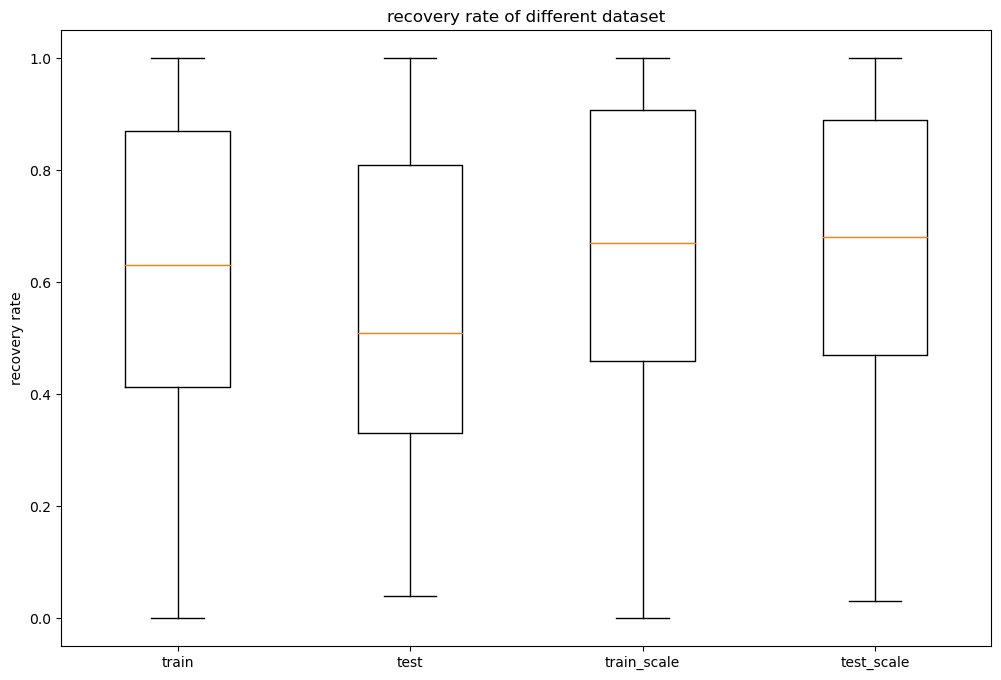

In [11]:
# path_train_df['recovery_rate'].mean()
# get the boxplot of the recovery rate, by the amino acid
plt.figure(figsize=(12, 8))
plt.boxplot([path_train_df['recovery_rate'], path_test_df['recovery_rate'], path_train_scale_df['recovery_rate'], path_test_scale_df['recovery_rate']], labels=['train', 'test', 'train_scale', 'test_scale'])
plt.ylabel('recovery rate')
plt.title('recovery rate of different dataset')
plt.show()

In [12]:
path_train_df['recovery_rate'].groupby(path_train_df['aa']).mean()

aa
ARG    0.570000
ASN    0.281667
ASP    0.405714
CYS    0.480000
GLN    0.365000
GLU    0.512500
HIS    0.390000
ILE    0.630000
LEU    0.727500
LYS    0.544286
MET    0.080000
PHE    0.577500
PRO    1.000000
SER    0.977000
THR    0.832000
TRP    0.483333
TYR    0.730000
VAL    0.848000
Name: recovery_rate, dtype: float64

In [13]:
# aa = ['',   'PHE', 'GLY', 'HIS', 'ILE',
#        'LYS', , 'MET', 'ASN', , 'GLN', 'ARG', 'SER', ,
#        'TRP', 'TYR']

aa = ['CYS', 'SER', 'THR', 'VAL', 'PRO', 'ASP', 'ASN', 'LEU', 'ILE', 'MET', 'GLU', 'GLN', 'LYS', 'HIS', 'PHE', 'ARG', 'TYR', 'TRP']

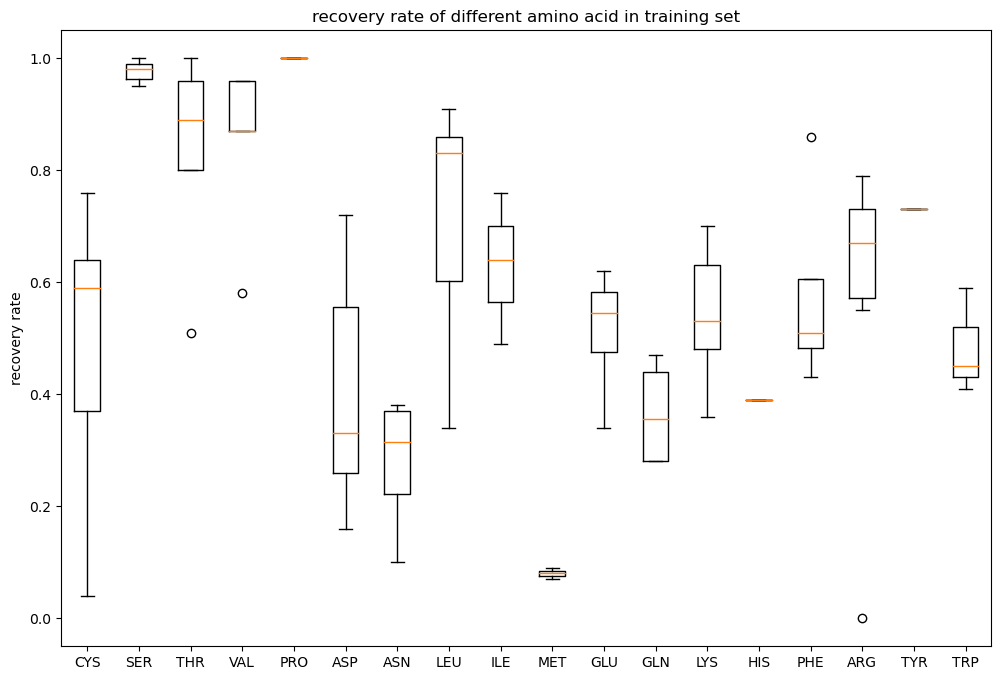

In [16]:
# visualize path_train_df, group by path_train_df['aa'] and get the boxplot of recovery rate
plt.figure(figsize=(12, 8))
plt.boxplot([path_train_df['recovery_rate'][path_train_df['aa'] == aa[i]] for i in range(len(aa))], labels=aa)
plt.ylabel('recovery rate')
plt.title('recovery rate of different amino acid in training set')
plt.show()

In [23]:
path_train_df[path_train_df['aa'] == 'HIS']

,aa,pos,ALA,CYS,ASP,GLU,PHE,GLY,HIS,ILE,...,GLN,ARG,SER,THR,VAL,TRP,TYR,UNK,INV,recovery_rate
71,HIS,159,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,0.39


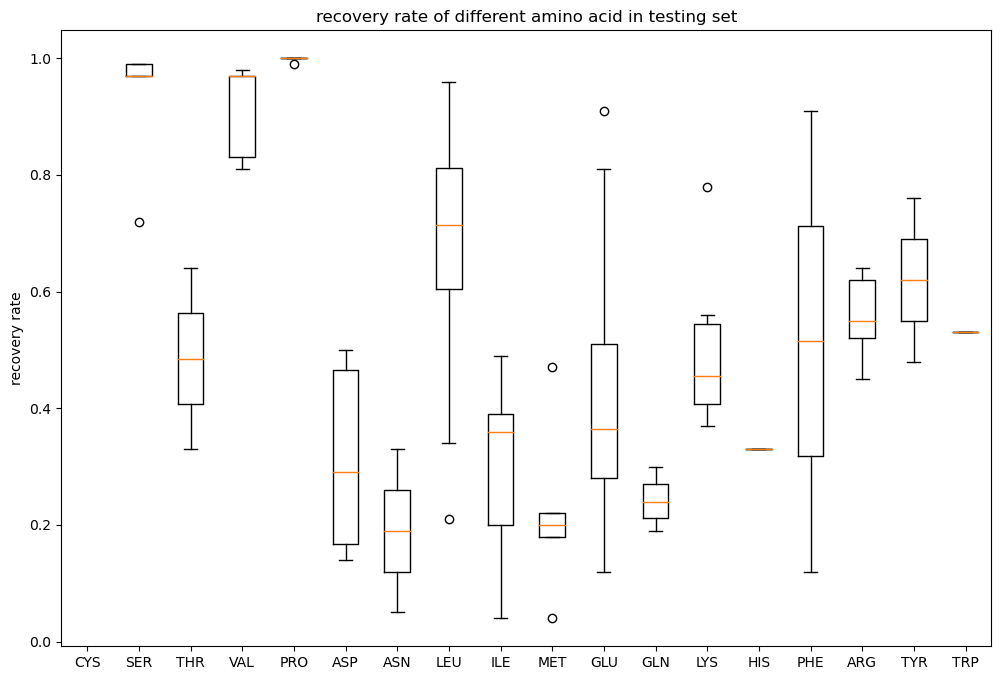

In [24]:
# visualize path_train_df, group by path_train_df['aa'] and get the boxplot of recovery rate
plt.figure(figsize=(12, 8))
plt.boxplot([path_test_df['recovery_rate'][path_test_df['aa'] == aa[i]] for i in range(len(aa))], labels=aa)
plt.ylabel('recovery rate')
plt.title('recovery rate of different amino acid in testing set')
plt.show()

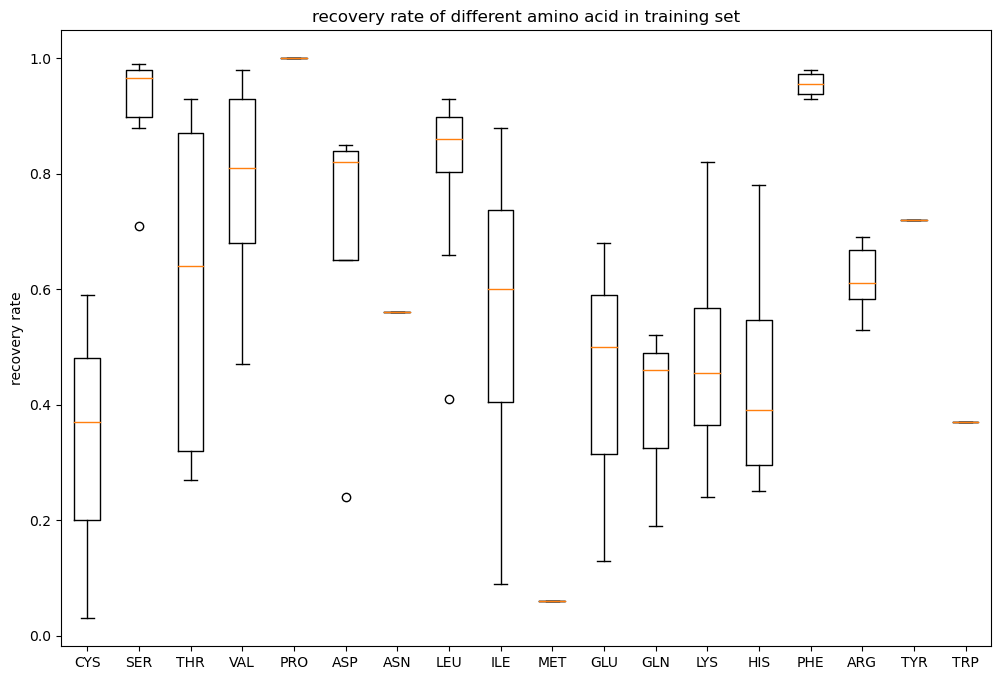

In [14]:
# visualize path_train_df, group by path_train_df['aa'] and get the boxplot of recovery rate
plt.figure(figsize=(12, 8))
plt.boxplot([path_test_scale_df['recovery_rate'][path_test_scale_df['aa'] == aa[i]] for i in range(len(aa))], labels=aa)
plt.ylabel('recovery rate')
plt.title('recovery rate of different amino acid in training set')
plt.show()

In [42]:
path_test_scale_df['recovery_rate'].isna().sum()

0

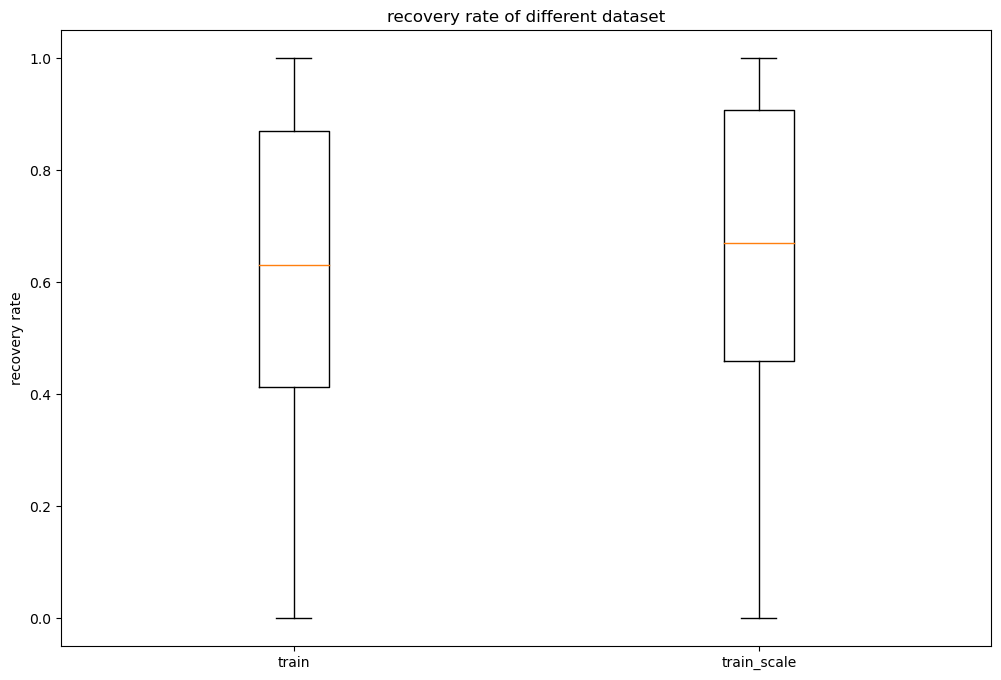

In [15]:
# path_train_df['recovery_rate'].mean()
# get the boxplot of the recovery rate, by the amino acid
plt.figure(figsize=(12, 8))
plt.boxplot([path_train_df['recovery_rate'][:90], path_train_scale_df['recovery_rate'][:90]], labels=['train', 'train_scale'])
plt.ylabel('recovery rate')
plt.title('recovery rate of different dataset')
plt.show()

In [ ]:
path_train_df.groupby('aa')['recovery_rate'].mean()

aa
ARG    0.928889
ASN    0.475000
ASP    0.840000
CYS    0.750000
GLN    0.180000
GLU    0.816000
HIS    1.000000
ILE    0.658000
LEU    0.883077
LYS    0.955000
MET    0.423333
PHE    0.992000
PRO    1.000000
SER    0.990000
THR    0.580000
TRP    1.000000
TYR    0.984000
VAL    0.721250
Name: recovery_rate, dtype: float64

In [19]:
path_train_df.groupby('aa')['recovery_rate'].count()

aa
ARG     9
ASN     2
ASP     9
CYS     2
GLN     2
GLU    15
HIS     3
ILE     5
LEU    13
LYS     2
MET     3
PHE     5
PRO     3
SER     7
THR     3
TRP     2
TYR     5
VAL     8
Name: recovery_rate, dtype: int64

In [46]:
from biotite.structure.io.pdb import PDBFile
from biotite.structure import AtomArray

pdb_5ly1 = "/home/qcx679/hantang/UAAG2/data/uaa_pdb_processed/5ly1_tidy.pdb"


In [47]:
pdb_file = PDBFile.read(pdb_5ly1)

In [48]:
structure = pdb_file.get_structure()

In [50]:
model = structure[0]

In [53]:
len(model)

11228

In [54]:
peptide = []
for atom in model:
    if atom.chain_id == 'E':
        peptide.append(atom)
# peptide = AtomArray(peptide)

In [56]:
len(peptide)

113

In [57]:
res_id = 0
res_ids = []
res_names = []
for atom in peptide:
    if atom.res_id != res_id:
        res_id = atom.res_id
        res_ids.append(res_id)
        res_names.append(atom.res_name)
    

In [63]:
len(res_ids)

12

In [59]:
res_names

['VAL',
 'TYR',
 'ASN',
 'THR',
 'ARG',
 'SER',
 'GLY',
 'TRP',
 'ARG',
 'TRP',
 'TYR',
 'THR']

In [40]:
three_to_one = {
    "ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D",
    "CYS": "C", "GLN": "Q", "GLU": "E", "GLY": "G",
    "HIS": "H", "ILE": "I", "LEU": "L", "LYS": "K",
    "MET": "M", "PHE": "F", "PRO": "P", "SER": "S",
    "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V",
    # Special/ambiguous cases
    "ASX": "B",  # Asp or Asn
    "GLX": "Z",  # Glu or Gln
    "XLE": "J",  # Leu or Ile
    "SEC": "U",  # Selenocysteine
    "PYL": "O",  # Pyrrolysine
    "UNK": "X",  # Unknown
}


In [60]:
res_names_one = [three_to_one[res_name] for res_name in res_names]

In [61]:
len(res_names_one)

12

In [62]:
res_names_one

['V', 'Y', 'N', 'T', 'R', 'S', 'G', 'W', 'R', 'W', 'Y', 'T']

In [ ]:
3 - 29